In [21]:
# Cell 1: Imports and Logging Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import logging
import os
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from textstat import textstat

# Configure logging
LOG_DIR = "../logs/analysis"
os.makedirs(LOG_DIR, exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
log_file = os.path.join(LOG_DIR, f'analysis_log_{timestamp}.log')

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_file, encoding='utf-8'),
        logging.StreamHandler()
    ]
)

In [38]:
# Cell 2: Load Data
try:
    input_file = '../data/processed/cleaned_data.xlsx'
    df = pd.read_excel(input_file)
    logging.info(f"Loaded data with shape {df.shape}")
    print("Dataset Overview:")
    print(df.info)
    print("\nFirst few rows:")
    print(df.head())
except Exception as e:
    logging.error(f"Error loading data: {str(e)}")

2025-02-11 16:02:54,222 - INFO - Loaded data with shape (5083, 9)


Dataset Overview:
<bound method DataFrame.info of       Unnamed: 0               translator  chapter  \
0           5002  A. Charles Muller, 1991        1   
1           5003  A. Charles Muller, 1991        2   
2           5004  A. Charles Muller, 1991        3   
3           5005  A. Charles Muller, 1991        4   
4           5006  A. Charles Muller, 1991        5   
...          ...                      ...      ...   
5078        2126               tom kunesh       77   
5079        2127               tom kunesh       78   
5080        2128               tom kunesh       79   
5081        2129               tom kunesh       80   
5082        2130               tom kunesh       81   

                                                                                                                                                                                                                                                                                                             

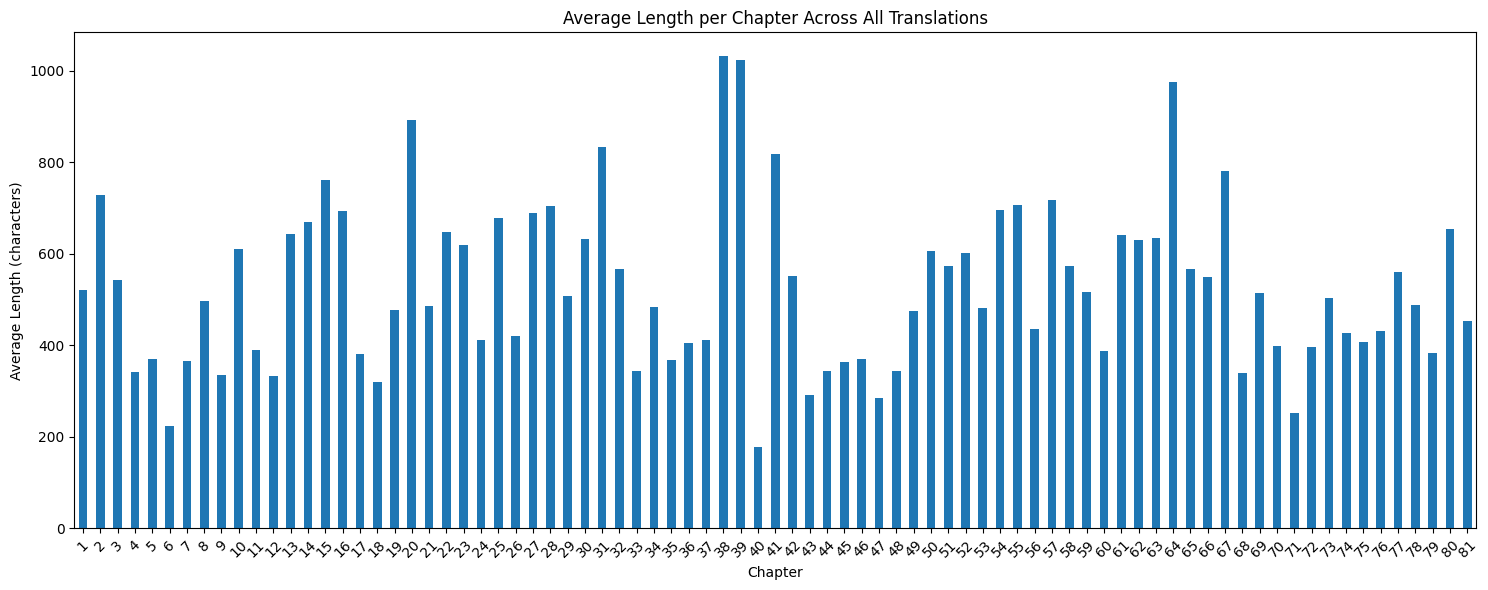

2025-02-11 15:30:16,094 - INFO - Completed length analysis by chapter


In [ ]:
# Cell 3: Basic Length Analysis
try:
    # Calculate average length per chapter
    avg_length_by_chapter = df.groupby('chapter')['cleaned_length'].mean()
    
    plt.figure(figsize=(15, 6))
    avg_length_by_chapter.plot(kind='bar')
    plt.title('Average Length per Chapter Across Translations')
    plt.xlabel('Chapter')
    plt.ylabel('Average Length (characters)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    logging.info("Completed length analysis by chapter")
except Exception as e:
    logging.error(f"Error in length analysis: {str(e)}")

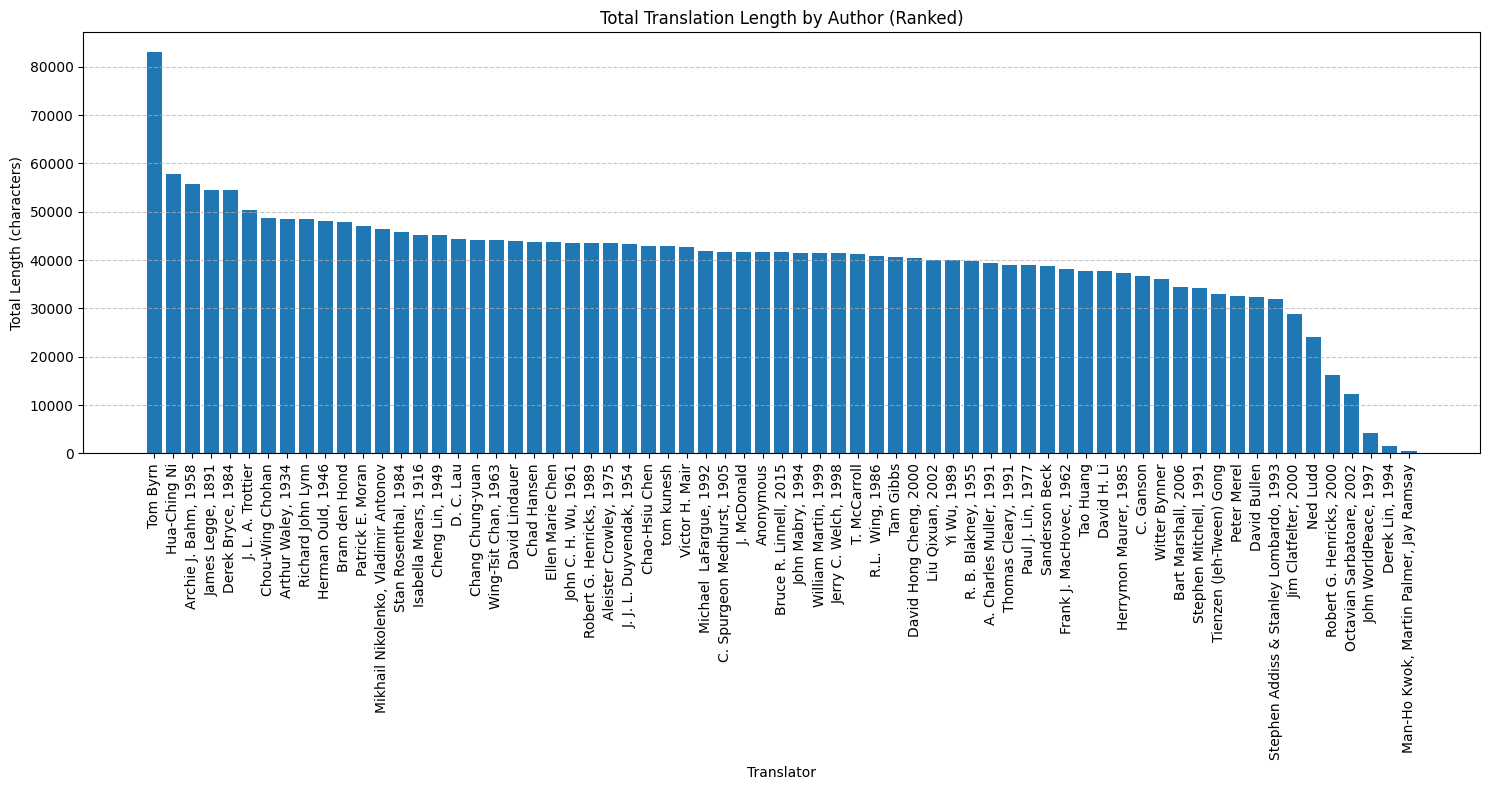

2025-02-11 15:30:23,406 - INFO - Completed author length analysis



Translation Length Statistics by Author:
count       67.000000
mean     39960.850746
std      12338.689456
min        458.000000
25%      37746.500000
50%      41653.000000
75%      44264.000000
max      82978.000000
Name: cleaned_length, dtype: float64


In [24]:
# Cell 4: Author Length Analysis
try:
    author_lengths = df.groupby('translator')['cleaned_length'].sum().sort_values(ascending=False)

    plt.figure(figsize=(15, 8))
    bars = plt.bar(range(len(author_lengths)), author_lengths.values)
    plt.title('Total Translation Length by Author (Ranked)')
    plt.xlabel('Translator')
    plt.ylabel('Total Length (characters)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(range(len(author_lengths)), author_lengths.index, rotation=90)
    plt.tight_layout()
    plt.show()

    logging.info("Completed author length analysis")
    
    # Print statistics
    print("\nTranslation Length Statistics by Author:")
    print(author_lengths.describe())
except Exception as e:
    logging.error(f"Error in author analysis: {str(e)}")

In [26]:
# Cell 5: Display Chapter 1 Translations
try:
    # Get Chapter 1 translations
    chapter_1_df = df[df['chapter'] == 1].sort_values('translator')[['translator', 'original_text', 'cleaned_text']]
    
    # Create a styled display
    pd.set_option('display.max_colwidth', None)  # Show full text
    styled_df = chapter_1_df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap'
    })
    
    print("Chapter 1 Translations:\n")
    display(styled_df)
    
    logging.info("Displayed Chapter 1 translations")
    
    # Print some basic stats
    print(f"\nTotal translations of Chapter 1: {len(chapter_1_df)}")
    
except Exception as e:
    logging.error(f"Error displaying Chapter 1 translations: {str(e)}")

Chapter 1 Translations:



,translator,original_text,cleaned_text
0,"A. Charles Muller, 1991","The Way that can be followed is not the eternal Way. The name that can be named is not the eternal name. The nameless is the origin of heaven and earth While naming is the origin of the myriad things. Therefore, always desireless, you see the mystery Ever desiring, you see the manifestations. These two are the same— When they appear they are named differently. This sameness is the mystery, Mystery within mystery; The door to all marvels.",the way that can be followed is not the eternal way the name that can be named is not the eternal name the nameless is the origin of heaven and earth while naming is the origin of the myriad things therefore always desireless you see the mystery ever desiring you see the manifestations these two are the same when they appear they are named differently this sameness is the mystery mystery within mystery the door to all marvels
81,"Aleister Crowley, 1975",". THE NATURE OF THE TAO The Tao-Path is not the All-Tao. The Name is not the Thing named. Unmanifested, it is the Secret Father of ########## ########## ########## Heaven #### #### #### #### #### #### and Earth manifested, it is their Mother. To understand this Mystery, one must be fulfilling one's will, and if one is not thus free, one will but gain a smattering of it. The Tao is one, and the Teh but a phase thereof. The abyss of this Mystery is the Portal of Serpent-Wonder. The Tao The Teh, source of the Mother #### #### The Tao, source of the Father ########## Heaven ########## ########## ########## Ch'ien #### #### #### #### ########## Fire #### #### ########## ########## Water - Tui Sun ########## #### #### ########## ########## ########## #### #### Air - Sun ########## #### #### #### #### Earth - Ken Moon #### #### ########## #### #### K'an Earth #### #### #### #### #### #### K'un",the nature of the tao the taopath is not the alltao the name is not the thing named unmanifested it is the secret father of heaven and earth manifested it is their mother to understand this mystery one must be fulfilling ones will and if one is not thus free one will but gain a smattering of it the tao is one and the teh but a phase thereof the abyss of this mystery is the portal of serpentwonder the tao the teh source of the mother the tao source of the father heaven chien fire water tui sun air sun earth ken moon kan earth kun
162,Anonymous,"The Ineffable, about which is spoken, is not the eternal Ineffable A name for the Unnameable, is but a name The Unnameable is what makes everything what it is By naming things you divide the Indivisible Only one who gives up all his desires can experience the Indivisible One who still cherishes desires, will experience only dissension Both will see the same reality, but experience it differently One who goes from the false reality into the other, Will pass through the narrow gate and receive the secret of true life up",the ineffable about which is spoken is not the eternal ineffable a name for the unnameable is but a name the unnameable is what makes everything what it is by naming things you divide the indivisible only one who gives up all his desires can experience the indivisible one who still cherishes desires will experience only dissension both will see the same reality but experience it differently one who goes from the false reality into the other will pass through the narrow gate and receive the secret of true life
243,"Archie J. Bahm, 1958","Nature can never be completely described, for such a description of Nature would have to duplicate Nature. No name can fully express what it represents. It is Nature itself, and not any part (or name or description) abstracted from Nature, which is the ultimate source of all that happens, all that comes and goes, begins and ends, is and is not. But to describe Nature as ""the ultimate source of all"" is still only a description, and such a description is not Nature itself. Yet since, in order to speak of i

2025-02-11 15:31:04,100 - INFO - Displayed Chapter 1 translations



Total translations of Chapter 1: 63


2025-02-11 15:33:28,694 - INFO - Analyzing chapter 1 with 63 translations



Analyzing Chapter 1


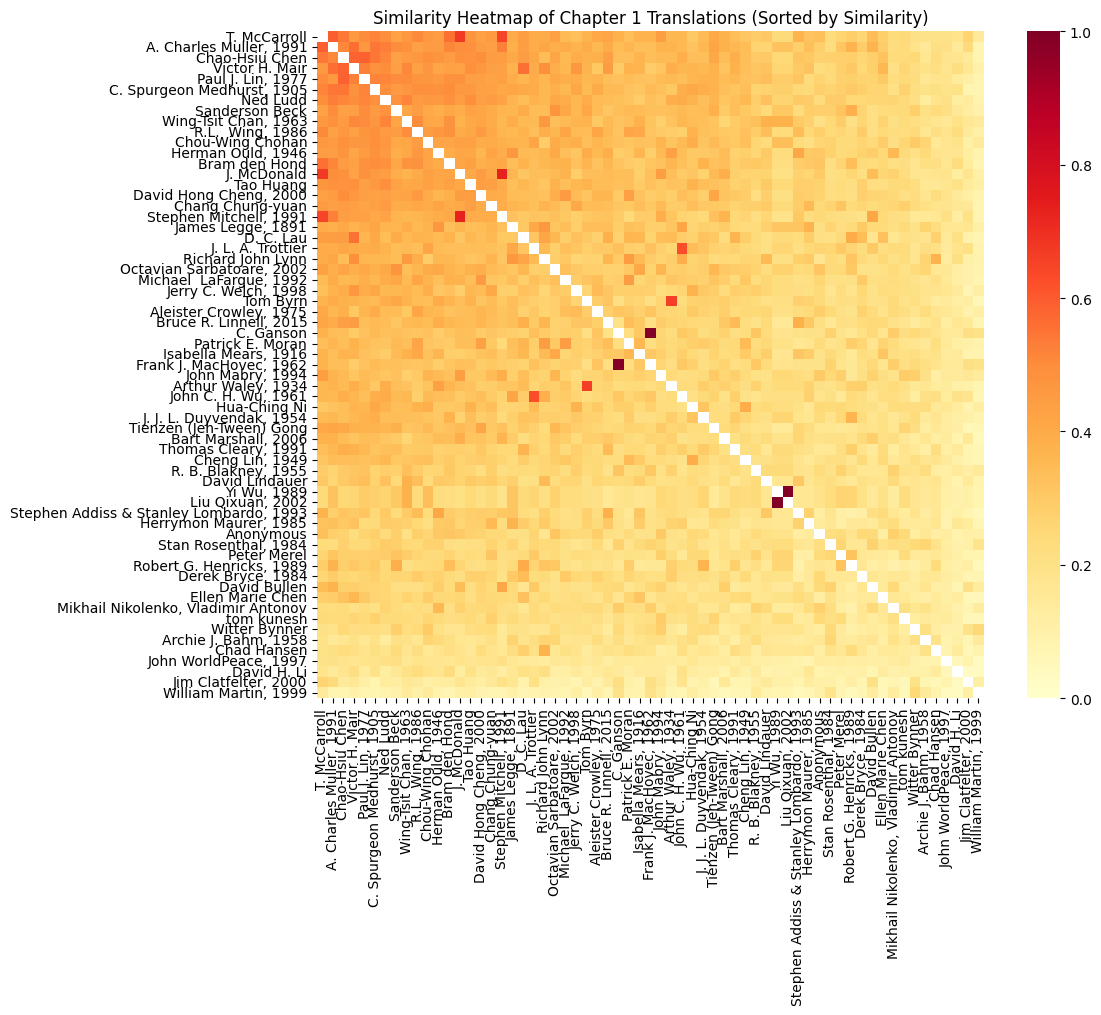

2025-02-11 15:33:30,631 - INFO - Completed similarity analysis for chapter 1
2025-02-11 15:33:30,635 - INFO - Analyzing chapter 42 with 62 translations



Chapter 1 Statistics:
--------------------------------------------------
Overall average similarity: 0.266
Similarity range: 0.034 to 1.000

Most Representative Translations (Highest Average Similarity):
--------------------------------------------------
1. T. McCarroll: 0.369
Text: the tao that can be spoken of is not the eternal tao the name that can be named is not the eternal name the nameless is the beginning of heaven and earth the name is the mother of the ten thousand thi...

2. A. Charles Muller, 1991: 0.365
Text: the way that can be followed is not the eternal way the name that can be named is not the eternal name the nameless is the origin of heaven and earth while naming is the origin of the myriad things th...

3. Chao-Hsiu Chen: 0.361
Text: the tao that can be named is not the eternal tao the name that can be spoken is not the eternal name the nameless is the beginning of heaven and earth the named is the mother of all creatures observe ...


Most Unique Translations (Lo

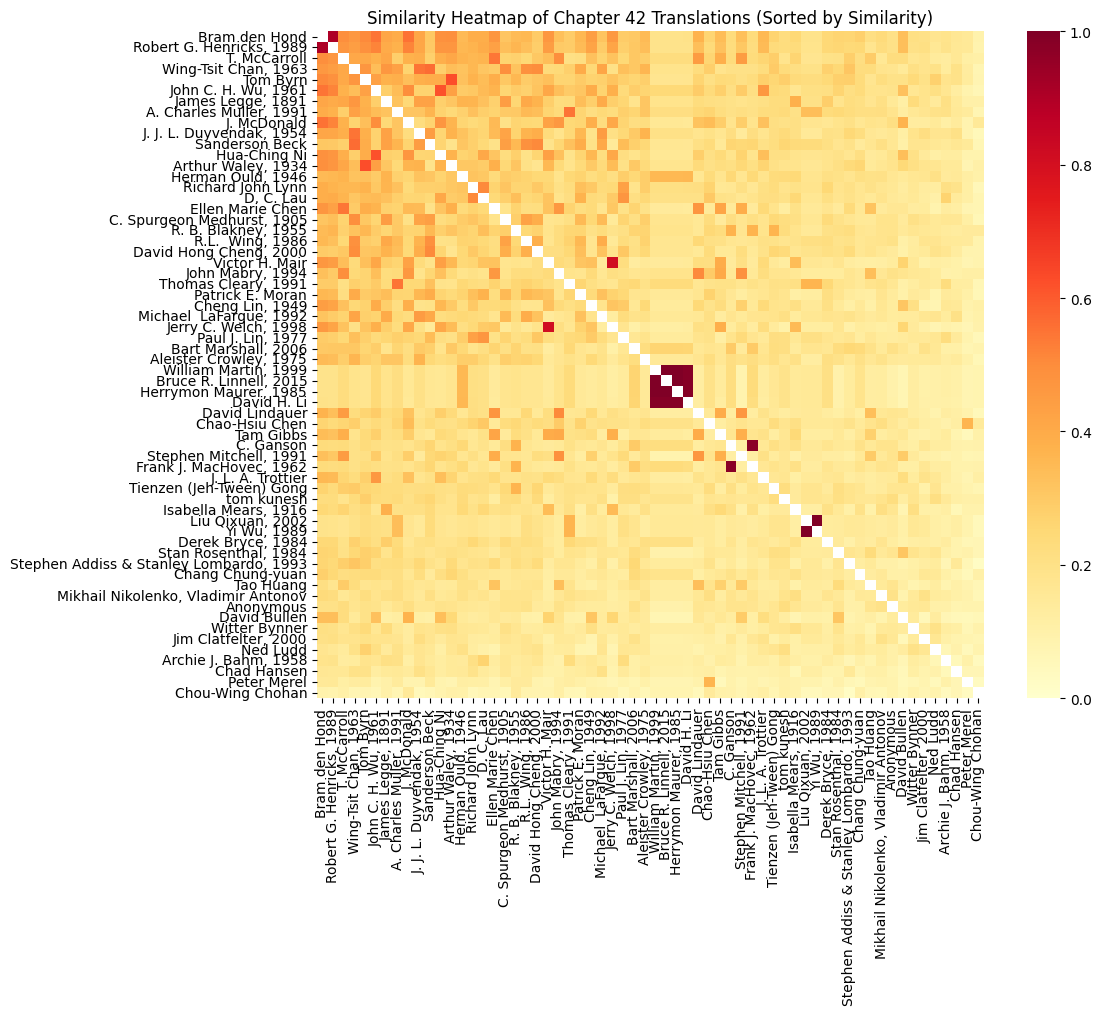

2025-02-11 15:33:32,213 - INFO - Completed similarity analysis for chapter 42



Chapter 42 Statistics:
--------------------------------------------------
Overall average similarity: 0.208
Similarity range: 0.026 to 1.000

Most Representative Translations (Highest Average Similarity):
--------------------------------------------------
1. Bram den Hond: 0.323
Text: harmony the tao gave birth to the one the one gave birth to the two the two gave birth to three and the three gave birth to the ten thousand things the ten thousand things carry yin on their backs and...

2. Robert G. Henricks, 1989: 0.312
Text: the way gave birth to the one the one gave birth to the two the two gave birth to the three and the three gave birth to the ten thousand things the ten thousand things carry yin on their backs and wra...

3. T. McCarroll: 0.287
Text: the tao gives birth to the one the one gives birth to two two gives birth to three and three gives birth to the ten thousand things the ten thousand things have their backs in the shadow while they em...


Most Unique Translations (L

In [29]:
# Cell 6: Chapter Similarity Analysis
def analyze_chapter_similarity(chapter_num, df):
    """Analyze and visualize translation similarities for a specific chapter."""
    try:
        # Filter for the specified chapter
        chapter_df = df[df['chapter'] == chapter_num].copy()
        logging.info(f"Analyzing chapter {chapter_num} with {len(chapter_df)} translations")
        
        # Create TF-IDF vectors and calculate similarity
        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform(chapter_df['cleaned_text'])
        similarity_matrix = cosine_similarity(tfidf_matrix)
        
        # Calculate and sort by average similarity
        np.fill_diagonal(similarity_matrix, np.nan)
        avg_similarities = np.nanmean(similarity_matrix, axis=1)
        sorted_indices = np.argsort(avg_similarities)[::-1]
        
        # Reorder everything based on similarity
        sorted_matrix = similarity_matrix[sorted_indices][:, sorted_indices]
        sorted_translators = chapter_df['translator'].values[sorted_indices]
        sorted_texts = chapter_df['cleaned_text'].values[sorted_indices]
        
        # Create heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(sorted_matrix, 
                   xticklabels=sorted_translators,
                   yticklabels=sorted_translators,
                   cmap='YlOrRd',
                   vmin=0, vmax=1,
                   annot=False,
                   square=True)
        plt.title(f'Similarity Heatmap of Chapter {chapter_num} Translations (Sorted by Similarity)')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Create sorted results DataFrame
        results_df = pd.DataFrame({
            'translator': sorted_translators,
            'average_similarity': [np.nanmean(sorted_matrix[i]) for i in range(len(sorted_translators))],
            'text': sorted_texts
        })
        
        # Print statistics
        print(f"\nChapter {chapter_num} Statistics:")
        print("-" * 50)
        print(f"Overall average similarity: {np.nanmean(similarity_matrix):.3f}")
        print(f"Similarity range: {np.nanmin(similarity_matrix):.3f} to {np.nanmax(similarity_matrix):.3f}")
        
        # Print top and bottom translations
        print("\nMost Representative Translations (Highest Average Similarity):")
        print("-" * 50)
        for idx in range(3):
            row = results_df.iloc[idx]
            print(f"{idx+1}. {row['translator']}: {row['average_similarity']:.3f}")
            print(f"Text: {row['text'][:200]}...")
            print()
            
        print("\nMost Unique Translations (Lowest Average Similarity):")
        print("-" * 50)
        for idx in range(-1, -4, -1):
            row = results_df.iloc[idx]
            print(f"{abs(idx)}. {row['translator']}: {row['average_similarity']:.3f}")
            print(f"Text: {row['text'][:200]}...")
            print()
        
        logging.info(f"Completed similarity analysis for chapter {chapter_num}")
        return results_df, similarity_matrix
        
    except Exception as e:
        logging.error(f"Error in similarity analysis for chapter {chapter_num}: {str(e)}")
        return None, None

# Analyze specific chapters
key_chapters = [1, 42]  # Example chapters
results = {}

for chapter_num in key_chapters:
    print(f"\nAnalyzing Chapter {chapter_num}")
    print("=" * 80)
    results[chapter_num] = analyze_chapter_similarity(chapter_num, df)

2025-02-11 15:36:24,874 - INFO - Aggregating full translations by author
2025-02-11 15:36:25,930 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-11 15:36:25,946 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/vd/mn3_24hn4hn_nn8wm4lzbd980000gn/T/ipykernel_41683/1375479191.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(sorted_translators, rotation=90)


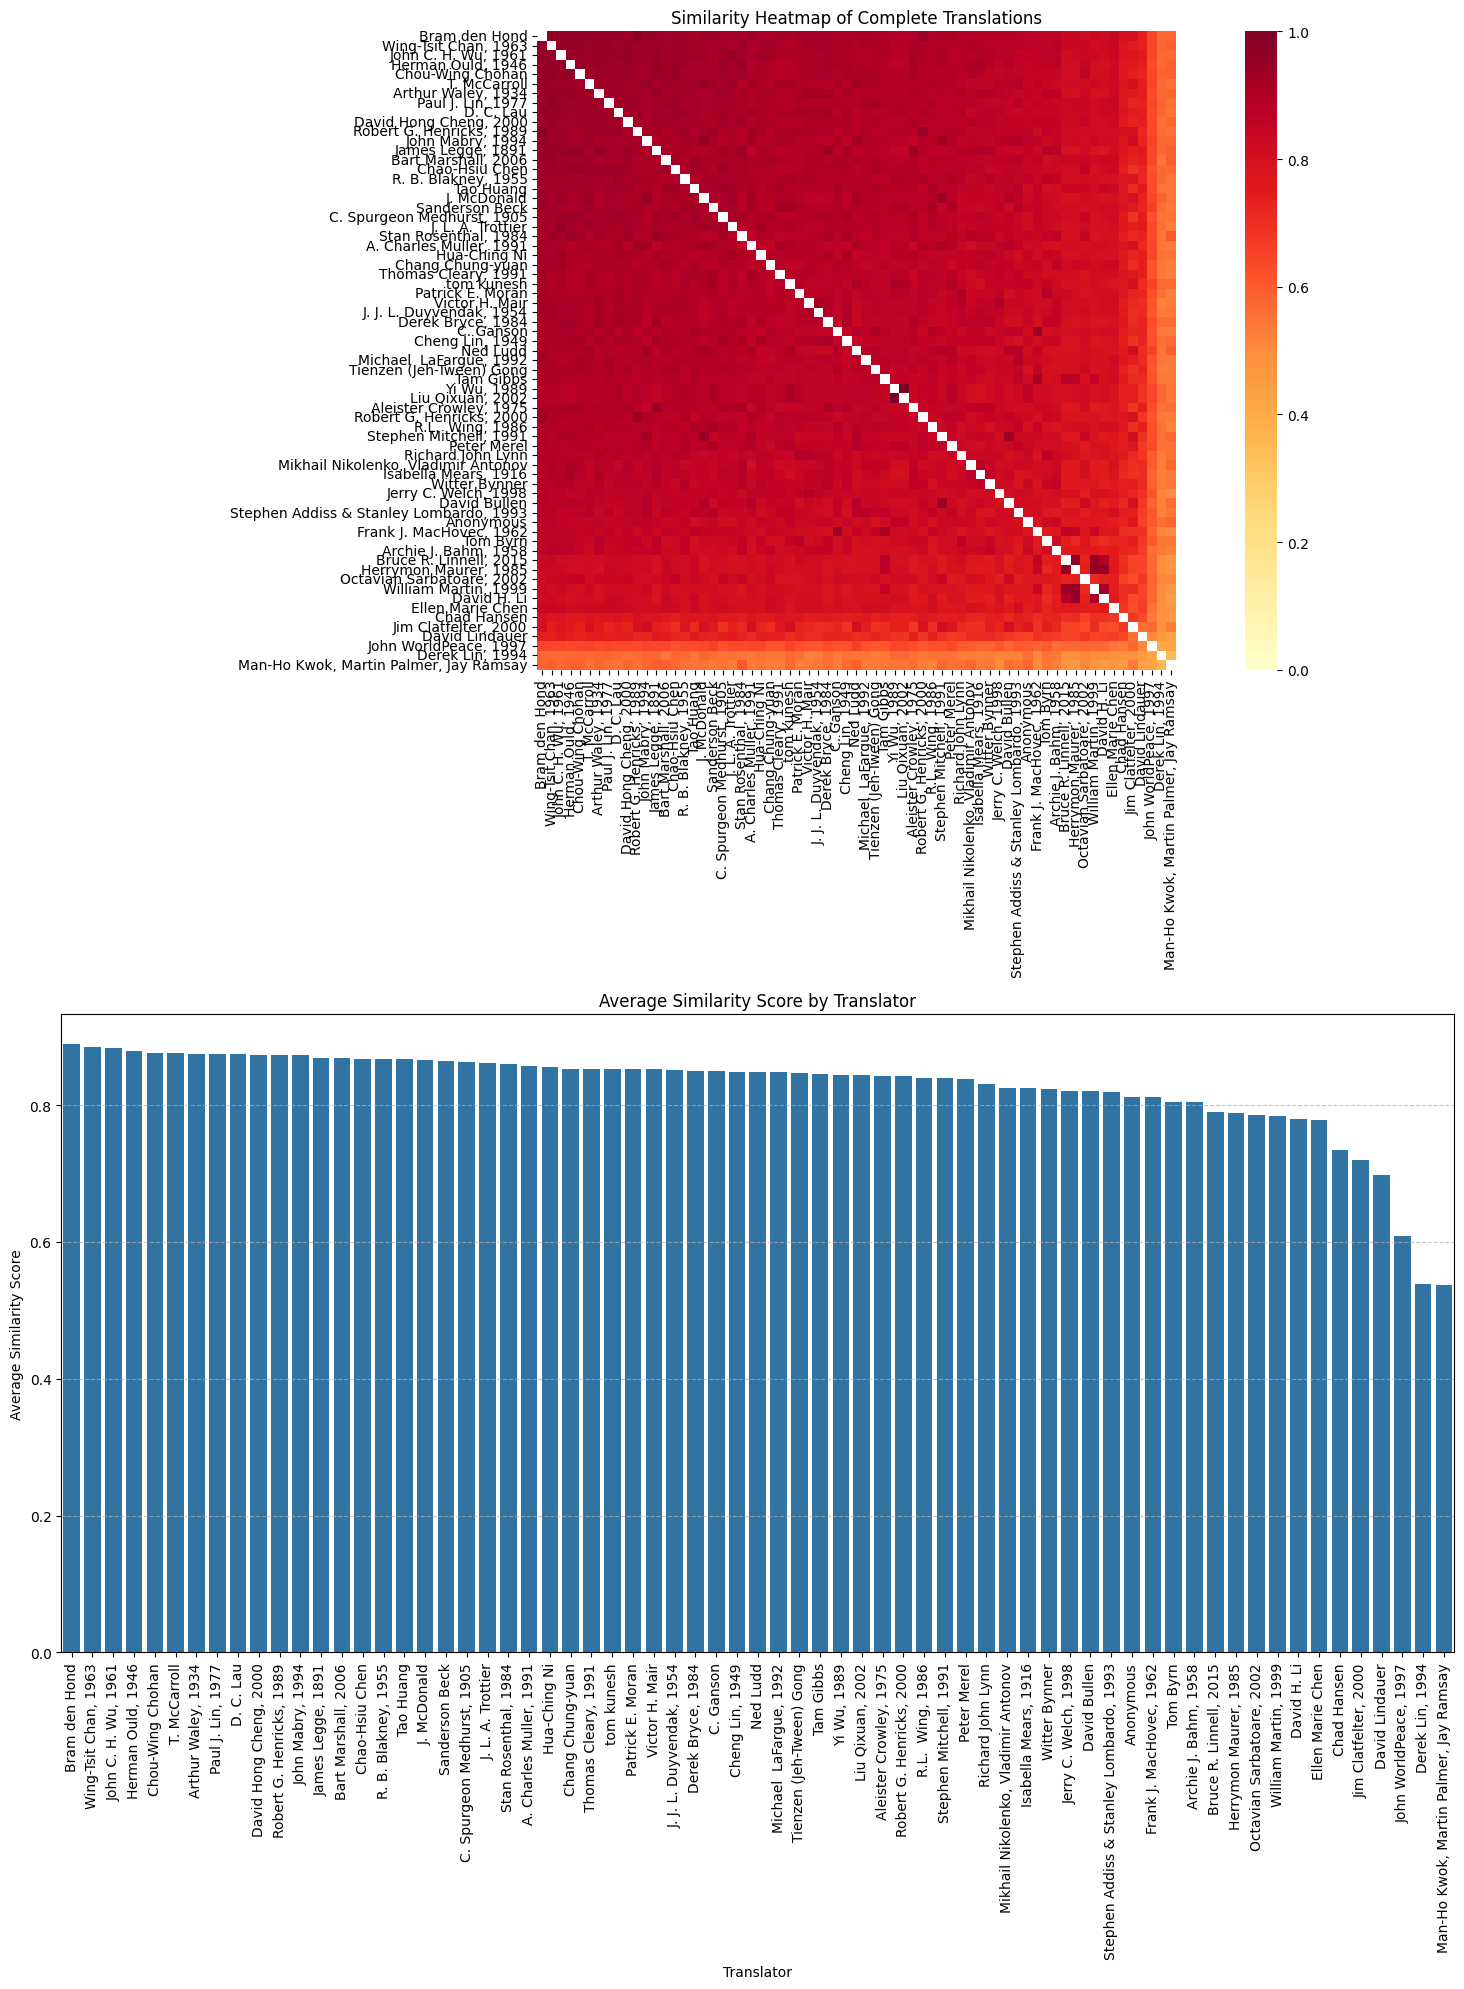

2025-02-11 15:36:27,806 - INFO - Completed full translation similarity analysis



Overall Translation Similarity Statistics:
--------------------------------------------------
Overall average similarity: 0.826
Similarity range: 0.353 to 1.000

Most Representative Translations (Highest Average Similarity):
--------------------------------------------------
          translator  average_similarity  text_length
       Bram den Hond            0.888475        48004
Wing-Tsit Chan, 1963            0.884033        44268
 John C. H. Wu, 1961            0.882579        43707
   Herman Ould, 1946            0.878375        48165
    Chou-Wing Chohan            0.876451        48764

Most Unique Translations (Lowest Average Similarity):
--------------------------------------------------
                            translator  average_similarity  text_length
                  Jim Clatfelter, 2000            0.719985        28910
                        David Lindauer            0.697715        43991
                 John WorldPeace, 1997            0.609293         4286
     

In [33]:
# Cell 7: Full Translation Similarity Analysis with Multiple Visualizations
def analyze_full_translations(df):
   """Analyze similarities between complete translations with multiple visualizations."""
   try:
       # Aggregate all chapters for each translator
       logging.info("Aggregating full translations by author")
       full_translations = df.groupby('translator').agg({
           'cleaned_text': lambda x: ' '.join(x.astype(str))
       }).reset_index()
       
       # Create TF-IDF vectors and calculate similarity
       tfidf = TfidfVectorizer()
       tfidf_matrix = tfidf.fit_transform(full_translations['cleaned_text'])
       similarity_matrix = cosine_similarity(tfidf_matrix)
       
       # Calculate and sort by average similarity
       np.fill_diagonal(similarity_matrix, np.nan)
       avg_similarities = np.nanmean(similarity_matrix, axis=1)
       sorted_indices = np.argsort(avg_similarities)[::-1]
       
       # Reorder everything based on similarity
       sorted_matrix = similarity_matrix[sorted_indices][:, sorted_indices]
       sorted_translators = full_translations['translator'].values[sorted_indices]
       sorted_texts = full_translations['cleaned_text'].values[sorted_indices]
       
       # Create figure with two subplots
       fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
       
       # Heatmap
       sns.heatmap(sorted_matrix, 
                  xticklabels=sorted_translators,
                  yticklabels=sorted_translators,
                  cmap='YlOrRd',
                  vmin=0, vmax=1,
                  annot=False,
                  square=True,
                  ax=ax1)
       ax1.set_title('Similarity Heatmap of Complete Translations')
       ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
       ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
       
       # Bar chart of average similarities
       average_sims = [np.nanmean(sorted_matrix[i]) for i in range(len(sorted_translators))]
       sns.barplot(x=range(len(sorted_translators)), 
                  y=average_sims,
                  ax=ax2)
       ax2.set_title('Average Similarity Score by Translator')
       ax2.set_xlabel('Translator')
       ax2.set_ylabel('Average Similarity Score')
       ax2.set_xticklabels(sorted_translators, rotation=90)
       ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
       
       plt.tight_layout()
       plt.show()
       
       # Create sorted results DataFrame
       results_df = pd.DataFrame({
           'translator': sorted_translators,
           'average_similarity': average_sims,
           'text_length': [len(text) for text in sorted_texts]
       })
       
       # Print statistics
       print("\nOverall Translation Similarity Statistics:")
       print("-" * 50)
       print(f"Overall average similarity: {np.nanmean(similarity_matrix):.3f}")
       print(f"Similarity range: {np.nanmin(similarity_matrix):.3f} to {np.nanmax(similarity_matrix):.3f}")
       
       # Print top and bottom translations with more detail
       print("\nMost Representative Translations (Highest Average Similarity):")
       print("-" * 50)
       top_5 = results_df.head()
       print(top_5.to_string(index=False))
           
       print("\nMost Unique Translations (Lowest Average Similarity):")
       print("-" * 50)
       bottom_5 = results_df.tail()
       print(bottom_5.to_string(index=False))
       
       # Most and least similar pairs
       most_similar_idx = np.unravel_index(np.nanargmax(similarity_matrix), similarity_matrix.shape)
       least_similar_idx = np.unravel_index(np.nanargmin(similarity_matrix), similarity_matrix.shape)
       
       print("\nMost Similar Pair:")
       print("-" * 50)
       print(f"{full_translations['translator'].iloc[most_similar_idx[0]]} and")
       print(f"{full_translations['translator'].iloc[most_similar_idx[1]]}")
       print(f"Similarity score: {similarity_matrix[most_similar_idx]:.3f}")
       
       print("\nLeast Similar Pair:")
       print("-" * 50)
       print(f"{full_translations['translator'].iloc[least_similar_idx[0]]} and")
       print(f"{full_translations['translator'].iloc[least_similar_idx[1]]}")
       print(f"Similarity score: {similarity_matrix[least_similar_idx]:.3f}")
       
       logging.info("Completed full translation similarity analysis")
       return results_df, similarity_matrix
       
   except Exception as e:
       logging.error(f"Error in full translation analysis: {str(e)}")
       return None, None

# Run full translation analysis
results_df, similarity_matrix = analyze_full_translations(df)

2025-02-11 15:37:40,498 - INFO - Starting chapter-wise similarity analysis


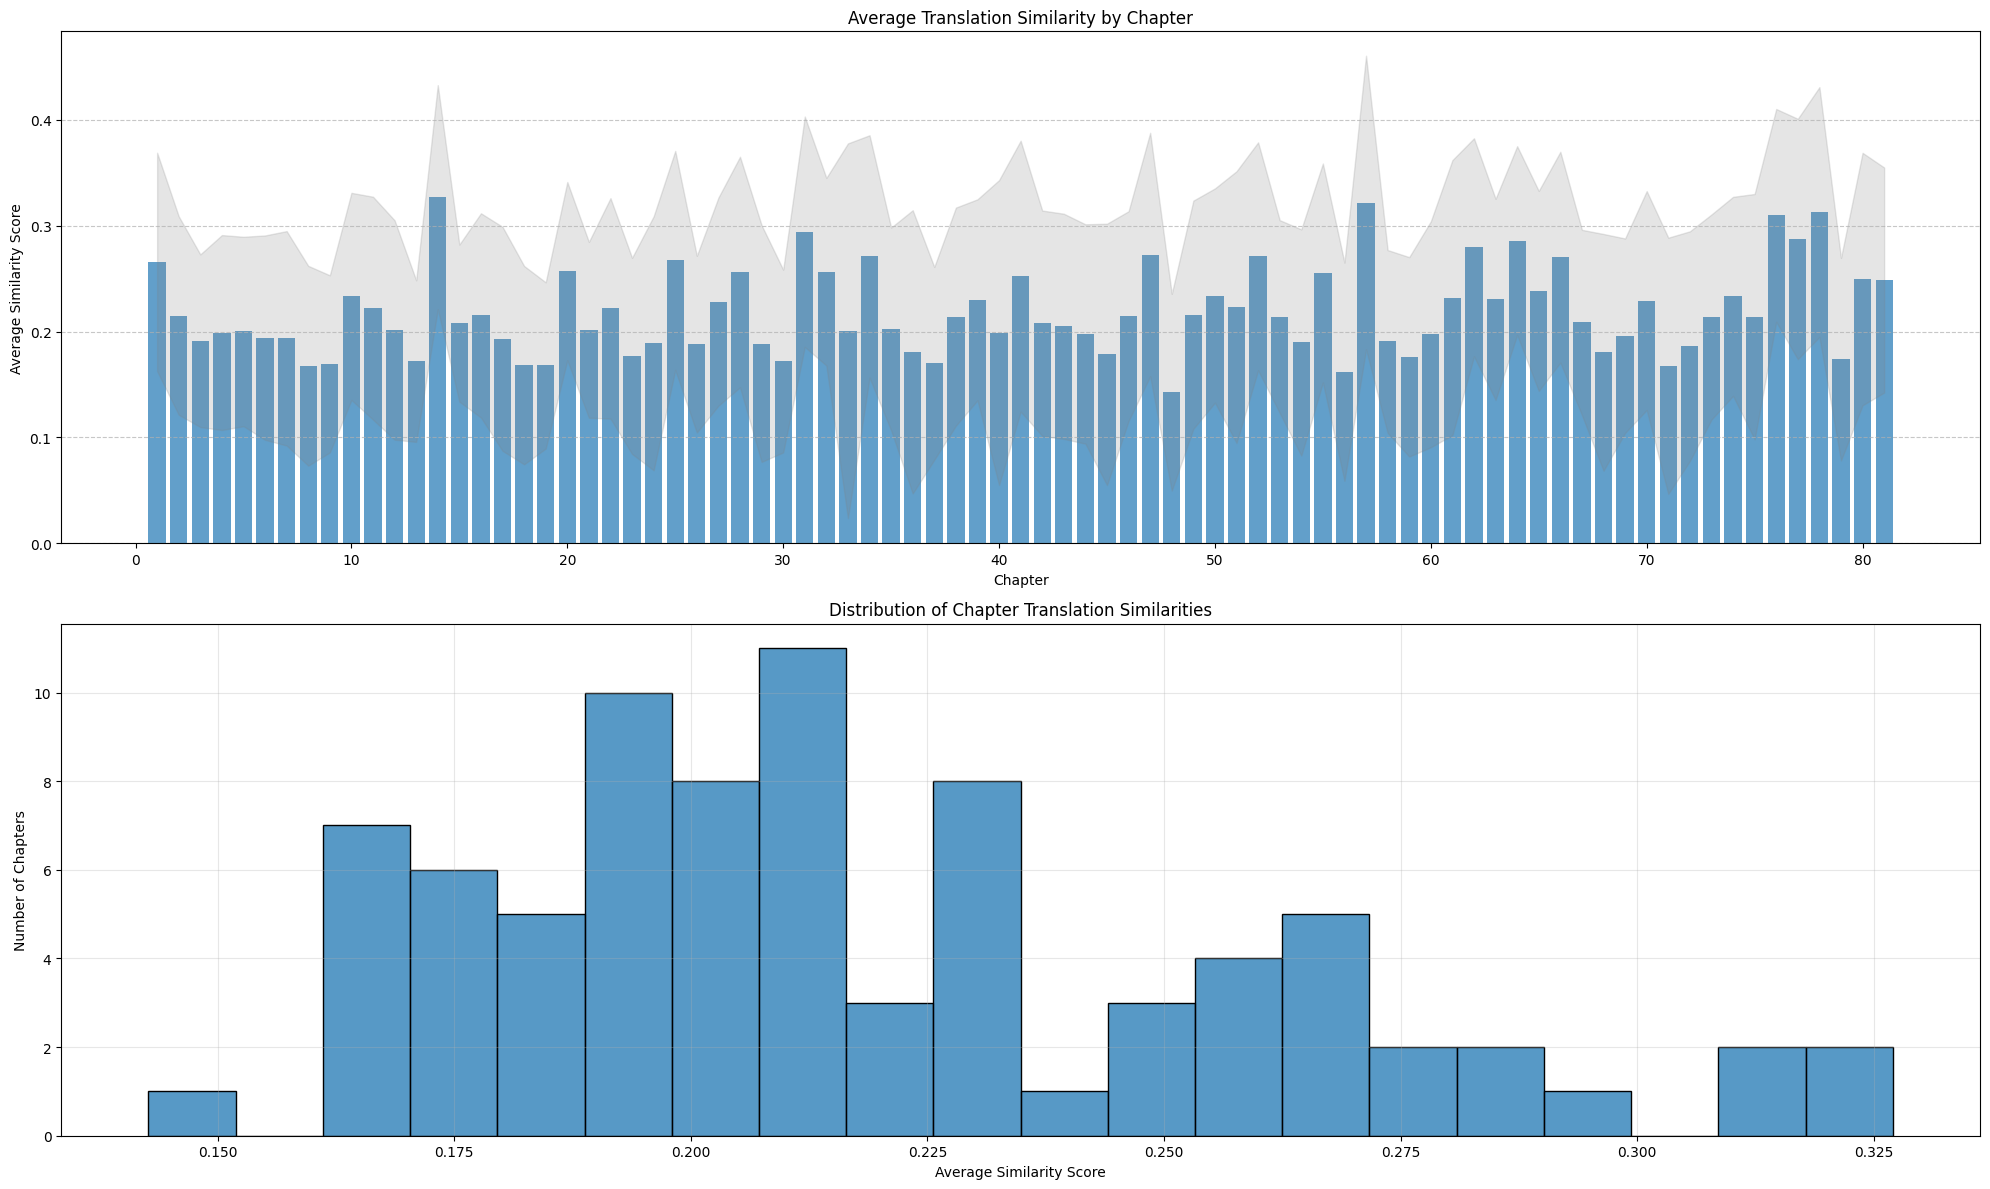

2025-02-11 15:37:42,210 - INFO - Completed chapter-wise similarity analysis



Overall Chapter Similarity Statistics:
--------------------------------------------------
Average similarity across all chapters: 0.219
Standard deviation of similarities: 0.041
Range: 0.143 to 0.327

Most Consistently Translated Chapters:
--------------------------------------------------
Chapter 14.0: 0.327 ± 0.106 (63.0 translations)
Chapter 57.0: 0.322 ± 0.139 (63.0 translations)
Chapter 78.0: 0.313 ± 0.118 (62.0 translations)
Chapter 76.0: 0.310 ± 0.101 (62.0 translations)
Chapter 31.0: 0.294 ± 0.109 (63.0 translations)

Most Diversely Translated Chapters:
--------------------------------------------------
Chapter 48.0: 0.143 ± 0.093 (63.0 translations)
Chapter 56.0: 0.162 ± 0.103 (63.0 translations)
Chapter 71.0: 0.168 ± 0.121 (62.0 translations)
Chapter 8.0: 0.168 ± 0.094 (64.0 translations)
Chapter 19.0: 0.168 ± 0.079 (64.0 translations)


In [35]:
# Cell 8: Chapter-wise Similarity Analysis
def analyze_chapter_similarities(df):
    """Analyze similarity patterns across all chapters."""
    try:
        logging.info("Starting chapter-wise similarity analysis")
        
        # Calculate similarity scores for each chapter
        chapter_similarities = []
        for chapter in sorted(df['chapter'].unique()):
            # Get translations for this chapter
            chapter_df = df[df['chapter'] == chapter]
            
            # Ensure we have valid text (no NaN)
            valid_texts = chapter_df['cleaned_text'].fillna('').astype(str)
            
            if len(valid_texts) > 1:  # Need at least 2 texts to compare
                # Create TF-IDF vectors and calculate similarity
                tfidf = TfidfVectorizer()
                tfidf_matrix = tfidf.fit_transform(valid_texts)
                similarity_matrix = cosine_similarity(tfidf_matrix)
                
                # Calculate statistics
                np.fill_diagonal(similarity_matrix, np.nan)
                avg_similarity = np.nanmean(similarity_matrix)
                
                chapter_similarities.append({
                    'chapter': chapter,
                    'avg_similarity': avg_similarity,
                    'min_similarity': np.nanmin(similarity_matrix),
                    'max_similarity': np.nanmax(similarity_matrix),
                    'std_similarity': np.nanstd(similarity_matrix),
                    'n_translations': len(valid_texts)
                })
                
        # Convert to DataFrame
        similarity_df = pd.DataFrame(chapter_similarities)
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
        
        # Bar plot with standard deviation
        ax1.bar(similarity_df['chapter'], similarity_df['avg_similarity'], alpha=0.7)
        ax1.fill_between(similarity_df['chapter'],
                        similarity_df['avg_similarity'] - similarity_df['std_similarity'],
                        similarity_df['avg_similarity'] + similarity_df['std_similarity'],
                        alpha=0.2, color='gray')
        ax1.set_title('Average Translation Similarity by Chapter')
        ax1.set_xlabel('Chapter')
        ax1.set_ylabel('Average Similarity Score')
        ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Histogram of similarities
        sns.histplot(data=similarity_df, x='avg_similarity', bins=20, ax=ax2)
        ax2.set_title('Distribution of Chapter Translation Similarities')
        ax2.set_xlabel('Average Similarity Score')
        ax2.set_ylabel('Number of Chapters')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print("\nOverall Chapter Similarity Statistics:")
        print("-" * 50)
        print(f"Average similarity across all chapters: {similarity_df['avg_similarity'].mean():.3f}")
        print(f"Standard deviation of similarities: {similarity_df['avg_similarity'].std():.3f}")
        print(f"Range: {similarity_df['avg_similarity'].min():.3f} to {similarity_df['avg_similarity'].max():.3f}")
        
        # Find and display extreme chapters
        most_similar = similarity_df.nlargest(5, 'avg_similarity')
        least_similar = similarity_df.nsmallest(5, 'avg_similarity')
        
        print("\nMost Consistently Translated Chapters:")
        print("-" * 50)
        for _, row in most_similar.iterrows():
            print(f"Chapter {row['chapter']}: {row['avg_similarity']:.3f} ± {row['std_similarity']:.3f} "
                  f"({row['n_translations']} translations)")
        
        print("\nMost Diversely Translated Chapters:")
        print("-" * 50)
        for _, row in least_similar.iterrows():
            print(f"Chapter {row['chapter']}: {row['avg_similarity']:.3f} ± {row['std_similarity']:.3f} "
                  f"({row['n_translations']} translations)")
        
        logging.info("Completed chapter-wise similarity analysis")
        return similarity_df
        
    except Exception as e:
        logging.error(f"Error in chapter similarity analysis: {str(e)}")
        return None

# Run chapter similarity analysis
similarity_df = analyze_chapter_similarities(df)